# Data exploration

In [1]:
pwd

'/Users/ericwulff/Documents/LTH/Examensarbete/lth_thesis_project'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import matplotlib as mpl
import my_matplotlib_style as ms
mpl.rc_file('my_matplotlib_rcparams')

In [3]:
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import utils

In [4]:
# Loading leading jet data
path_to_processed_data = 'processed_data/'

In [5]:
train = pd.read_pickle(path_to_processed_data + 'train.pkl')
test = pd.read_pickle(path_to_processed_data + 'test.pkl')
train, test = utils.log_normalize(train, test)
train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

bs = 4096
train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))
train_dl, valid_dl = utils.get_data(train_ds, valid_ds, bs)

In [6]:
print(len(train))
train = train[(train['pT'] < 10000)]
test = test[(test['pT'] < 10000)]
print(len(train))

1550321
1550321


In [7]:
print(train.shape, test.shape)

(1550321, 4) (387581, 4)


In [8]:
train.head() 

,pT,eta,phi,E
1367643,0.826070,0.039464,-0.486942,0.827491
1739612,0.634036,1.511836,-0.395065,1.190291
546066,0.781118,0.438087,-0.314664,0.881215
213212,0.624118,0.003553,-0.141598,0.624576
150544,0.781247,0.810970,-0.769449,1.034222


In [9]:
def plot_data(data, e_range=None, pt_range=None, save=False, title=True, logy=False):

    plt.figure()
    plt.hist(data['pT'], bins=100, range=pt_range)
    plt.xlabel(r'$p_T$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if logy:
        plt.yscale('log')
    if save:
        plt.savefig('data_exploration_figures/hist_pt_train.png')
    
    plt.figure()
    plt.hist(data['eta'], bins=100)
    plt.xlabel(r'$\eta$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if save:
        plt.savefig('data_exploration_figures/hist_eta_train.png')
    
    plt.figure()
    plt.hist(data['phi'], bins=100)
    plt.xlabel(r'$\phi$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if save:
        plt.savefig('data_exploration_figures/hist_phi_train.png')    
        
    plt.figure()
    plt.hist(data['E'], bins=100, range=e_range)
    plt.xlabel(r'$E$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if logy:
        plt.yscale('log')
    if save:
        plt.savefig('data_exploration_figures/hist_E_train.png')

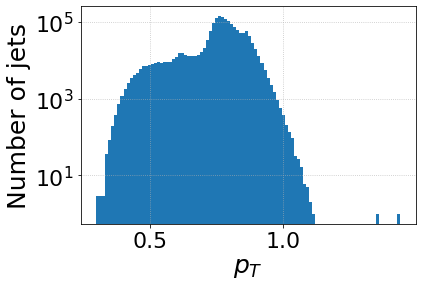

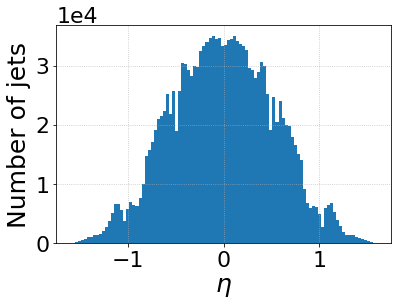

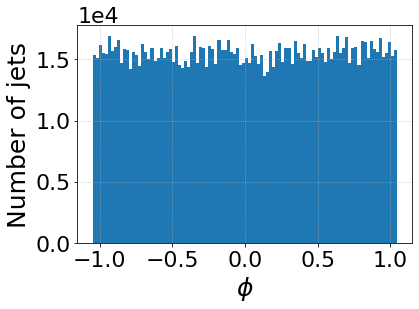

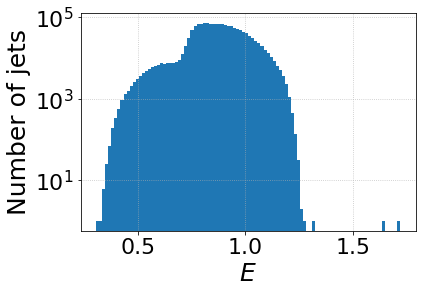

In [10]:
#plot_data(train, pt_range=(0, 1000), e_range=(0,4000), save=True, title=False)
plot_data(train, save=False, logy=True, title=False)

In [11]:
train.mean()


pT     0.760037
eta   -0.007237
phi    0.002947
E      0.873826
dtype: float32

In [12]:
train.std()

pT     0.094840
eta    0.531642
phi    0.607135
E      0.125960
dtype: float32

In [13]:
test.mean()

pT     0.760386
eta   -0.006468
phi    0.000647
E      0.874291
dtype: float32

In [14]:
test.std()

pT     0.094885
eta    0.532075
phi    0.606612
E      0.126001
dtype: float32

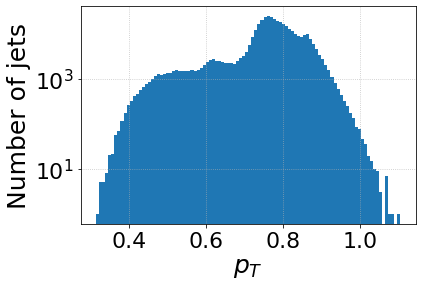

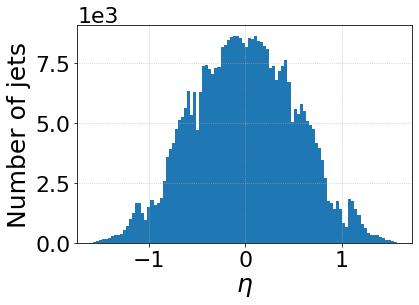

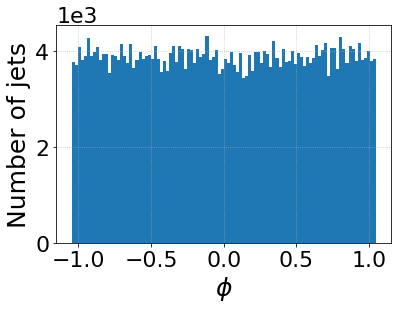

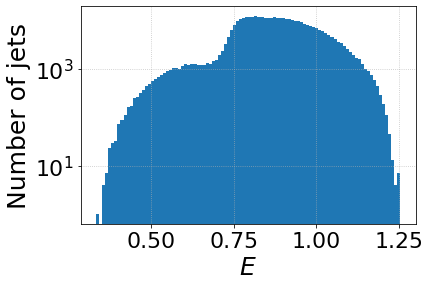

In [15]:
plot_data(test, save=False, logy=True, title=False)